### Linear Regression
1. <b>Understant key statistical concepts of a linear model</b>
2. <b>SSE, RSE, TSS</b>
3. <b> Student-T test of significance </b>
4. <b>Statistical Significance Of Coefficients</b>
5. <b> The P-Value</b>

In [1]:
import json
import matplotlib
import warnings
import pandas as pd
import numpy as np
import scipy 
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

warnings.simplefilter("ignore")
root = r"/Users/Kenneth-Aristide/anaconda3/bin/python_prog/ML/styles/bmh_matplotlibrc.json"
s = json.load(open(root))
matplotlib.rcParams.update(s)
% matplotlib inline

The Leaning Tower of Pisa is one of the largest tourist attractions in Italy. For hundreds of years this tower slowly leaned to one side, eventually reaching 5.5 degrees off axis, nearly 3 meters horizontal at it's peak. Yearly data was recorded from 1975 to 1987 measuring the tower's lean. In 1988 restoration began on the tower to stop more leaning in the future. The data is provided in the dataframe pisa. The column lean represents the number of meters the tower is off axis at the respective year.

Our mission is to  try to estimate the leaning rate using a linear regression and interpret its coefficient and statistics

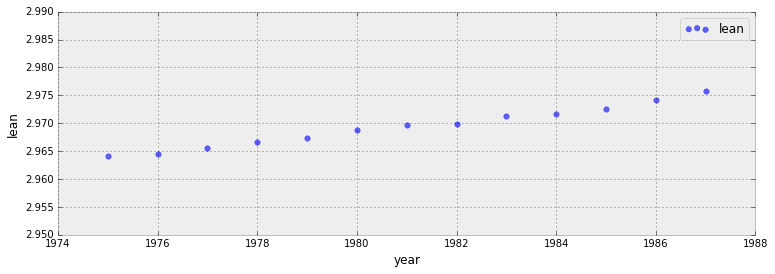

In [2]:
# data
pisa = pd.DataFrame({"year": range(1975, 1988), 
                         "lean": [2.9642, 2.9644, 2.9656, 2.9667, 2.9673, 2.9688, 2.9696, 
                                  2.9698, 2.9713, 2.9717, 2.9725, 2.9742, 2.9757]})

# Plots
figsize(12.5, 4)
plt.scatter(pisa["year"], pisa["lean"], s = 30, alpha = 0.6, color = "b")
plt.xlabel("year")
plt.ylabel("lean")
plt.legend();

$Statsmodels$ is a library which allows for rigorous statistical analysis in python.
For linear models, statsmodels provides ample statistical measures for proper evaluation. The class $sm.OLS$ is used to fit linear models, standing for ordinary least squares. After the initialization of our model we fit data to it using the $.fit()$ method that estimates the coefficients of the linear model. $OLS()$ <b>does not automatically add an intercept to our model</b>. We can add a column of 1's to add another coefficient to our model and since the coefficient is multiplied by 1 we are given an intercept.

In [3]:
y = pisa.lean
X = pisa.year
X = sm.add_constant(X)
linear = sm.OLS(y, X)
linearfit = linear.fit()

linearfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lean   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     904.1
Date:                Wed, 01 Mar 2017   Prob (F-statistic):           6.50e-12
Time:                        20:08:27   Log-Likelihood:                 83.777
No. Observations:                  13   AIC:                            -163.6
Df Residuals:                      11   BIC:                            -162.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.1233      0.061     18.297      0.000         0.988     1.258
year           0.0009    3.1e-05     30.069      0.000         0.001     0.001
==============================================================================
Omnibus:                        0.310   Durbin-Watson:                   1.642
Prob(Omnibus):                  0.856   Jarque-Bera (JB):                0.450
Skew:                           0.094   Prob(JB):                        0.799
Kurtosis:                       2.108   Cond. No.                     1.05e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Mathematicaly a basic linear regression is define as $y_i = \beta_0 + \beta_1 * x_i + e_i $ where $ e_i \sim \text{Normal}(0, \sigma^2) $ is the error term for each observation $i$ and where $ \beta_0 $  is the <b> intercept </b> and $\beta_1$ the <b> slope </b>.
The <b>residual</b> for the prediction of observation $i$ is $e_i = ÿ_i - y_i$ where $ÿ_i$ is the prediction.
$\text{Normal}(0, \sigma^2) $ is the $Normal$ $distribution$ with mean 0 and variance $\sigma^2$. This means that the model assume that the erros, knows as residuals, between our prediction and observed values are normally distributed and that the average error is 0.
Estimated coefficient, those which are modeled, will be referred to as $\beta_{i}$(^) while $\beta_i$ is the true coefficient.

In [4]:
yhat = linearfit.predict(X)
residuals = yhat - y

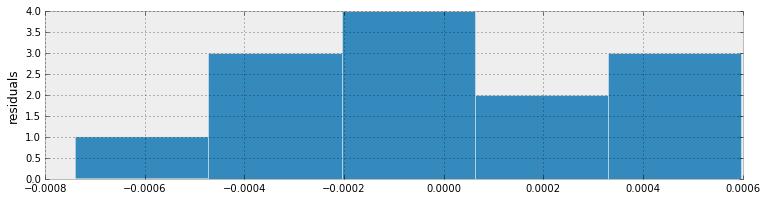

In [5]:
figsize(12.5, 3)
plt.hist( residuals, bins = 5)
plt.ylabel("residuals")
plt.legend();

Our dataset only has 13 observations in it making it difficult to interpret such a plot. Though the plot looks somewhat normal the largest bin only has 4 observations. In this case we cannot reject the assumption that the residuals are normal. Let's move forward with this linear model and look at measures of statistical fit

Many of the statistical measures used to evaluate linear regression models rely on three sum of squares measures. The three measures include <b>Sum of Square Error</b> $(SSE)$, <b>Regression Sum of Squares</b> $(RSS)$, and <b>Total Sum of Squares</b> $(TSS)$. In aggregate each of these measures explain <i>the variance</i> of the entire model. We define the measures as the following:<br><br>
$SSE$ = $\sum_{i=1}^N (y_i - yhat)^2 = \sum_{i=1}^N e_i^2 $<br>  $SSE$ is the sum of all residuals giving us a measure between the model's prediction and the observed values.<br><br>
$RSS$ = $\sum_{i=1}^N (ÿ_i - yhat)^2 $   where $ÿ_i = \frac{1}{n} \sum_{i=1}^N y_i$ <br>
$RSS$ measures the amount of explained variance which our model accounts for. For instance, if we were to predict every observation as the mean of the observed values then our model would be useless and RSS would be very low.<b> A large RSS and small SSE can be an indicator of a strong model</b><br><br>
$TSS$ = $\sum_{i=1}^N (y_i - ÿ_i)^2$ measures the total amount of variation within the data

With some algebra we can show that $TSS$ = $RSS$ + $SSE$
. Intuitively this makes sense, the total amount of variance in the data is captured by the variance explained by the model plus the variance missed by the model.

In [6]:
SSE = np.sum((y - yhat)**2)
y_new = np.sum(y)/len(y)
RSS = np.sum((y_new - yhat)**2)
TSS = np.sum((y - y_new)**2)

### R-Squared
The coefficient of determination, also known as <b>R-Squared</b>, is a great measure of linear dependence. It is a single number which tells us what the percentage of variation in the target variable is explained by our model.<br>
$ R^2 = 1 - \frac{SSE}{TSS} = \frac{RSS}{TSS}$<br>
Intuitively we know that a low SSE and high RSS indicates a good fit. This single measure tells us what percentage of the total variation of the data our model is accounting for. Correspondingly, the $R^2$
 exists between 0 and 1.

In [7]:
R_squared = RSS/TSS
R_squared

0.98797971568427967

Below we see the summary of our model. There are many statistics here including R-squared, the number of observations, and others. In the second section there are coefficients with corresponding statistics. The row year corresponds to the independent variable x while lean is the target variable. The variable const represents the model's intercept.

First we look at the coefficient itself. The coefficient measures how much the dependent variable will change with a unit increase in the independent variable. For instance, we see that the coefficient for year is 0.0009. This means that on average the tower of Pisa will lean 0.0009 meters per year.

### Variance of  coefficients
The variance of each of the coefficients is an important and powerful measure. In our example the coefficient of year represents the number of meters the tower will lean each year. The variance of this coefficient would then give us an interval of the expected movement for each year.

In the summary output, next to each coefficient, you see a column with standard errors. The standard error is the square root of the estimated variance. The estimated variance for a single variable linear model is defined as:
$s^2(\beta_1) = \frac{SSE}{(n - 2)\sum_{i = 1}^n (x_i - x_{hat})^2}$<br>
Using this variance we will be able to compute t-statistics and confidence intervals regarding this $\beta_1$.

In [8]:
s2_b1 = SSE / ((y.shape[0] - 2)* np.sum((pisa.year - pisa.year.mean())**2))
s2_b1

9.604681033252045e-10

### T-Distribution
Statistical tests can be done to show that the lean of the tower is dependent on the year. A common test of statistical significance is <b>the student t-test</b>. The student t-test relies on the t-distribution, which is very similar to the normal distribution, following the bell curve but with a lower peak.

The t-distribution accounts for the number of observations in our sample set while the normal distribution assumes we have the entire population. In general, the smaller the sample we have the less confidence we have in our estimates. The t-distribution takes this into account by increasing the variance relative to the number of observations. You will see that as the number of observations increases the t-distribution approaches the normal distribution.

The density functions of the t-distributions are used in significance testing. The probability density function (pdf) models the relative likelihood of a continuous random variable. The cumulative density function (cdf) models the probability of a random variable being less than or equal to a point. The degrees of freedom (df) accounts for the number of observations in the sample. In general the degrees of freedom will be equal to the number of observations minus 2. Say we had a sample size with just 2 observations, we could fit a line through them perfectly and no error in the model. To account for this we subtract 2 from the number of observations to compute the degrees of freedom.

Scipy has functions in the library scipy.stats.t which can be used to compute the pdf and cdf of the t-distribution for any number of degrees of freedom. $scipy.stats.t.pdf(x,df)$ is used to estimate the pdf at variable x with df degrees of freedom.

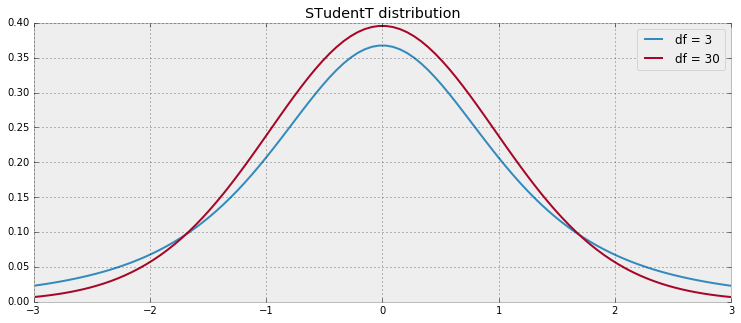

In [9]:
x = np.linspace(-3, 3, 100)

tdist3 = scipy.stats.t.pdf(x, df = 3)
tdist30 = scipy.stats.t.pdf(x, df = 30)

figsize(12.5, 5)
fig = plt.figure()
plt.title("STudentT distribution")
fig = plt.plot(x, tdist3, label = "df = 3")
fig = plt.plot(x, tdist30, label = "df = 30")
plt.legend();

Now that we know what the t-distribution is we can use it for significance testing. To do significance testing we must first start by stating our hypothesis. We want to test whether the lean of the tower depends on the year, ie. every year the tower leans a certain amount. This is done by setting null and alternative hypotheses. In our case we will say the null hypothesis is that the lean of the tower of Pisa does not depend on the year, meaning the coefficient will be equal to zero. The alternative hypothesis would then be that the lean of the tower depends on the year, i.e., the coefficient is not equal to zero. These are written mathematically as,<br>
<center>$H_0 : \beta_1 = 0 $  $H_1: \beta_1 \ne0 $</center>
Testing the null hypothesis is done by using the t-distribution. The t-statistic is defined as,
<center>$ t = \frac{\beta_1 - 0}{\sqrt(s^2(\beta_1))}$</center><br>
This statistic measures how many standard deviations the expected coefficient is from 0. If $\beta_1$
is far from zero with a low variance then t will be very high. We see from the pdf, a t-statistic far from zero will have a very low probability.

In [10]:
tsat = linearfit.params[1] / np.sqrt(s2_b1)
tsat

30.068584687648393

### The P-Value
Finally, now that we've computed the t-statistic we can test our coefficient. Testing the coefficient is easy, we need to find the probability of $\beta_1$ being different than 0 at some significance level. Lets use the 95% significance level, meaning that we are 95% certain that $\beta_1$ differs from zero. This is done by using the t-distribution.
By computing the cumulative density at the given p-value and degrees of freedom we can retrieve a corresponding probability.<br><br>
A two-sided test, one which tests whether a coefficient is either less than 0 and greater than 0, should be used for linear regression coefficients. For example, the number of meters per year which the tower leans could be either positive or negative and we must check both. To test whether $\beta_1$ is either positive or negative at the 95% confidence interval we look at the 2.5 and 97.5 percentiles in the distribution, leaving a 95% confidence between the two. Since the t-distribution is symmetrical around zero we can take the absolute value and test only at the 97.5 percentile (the positive side).<br><br>
If probability is greater than 0.975 than we can reject the null hypothesis ($H_0$) and say that the year significantly affects the lean of the tower.

In [11]:
# At the 95% confidence interval for a two-sided t-test we must use a p-value of 0.975
p_val = 0.975
# The degrees of freedom
df = pisa.shape[0] - 2

# the probability to test against
p = scipy.stats.t.cdf(tsat, df = df)

# test
beta1_test = p > p_val
beta1_test

True